In [119]:
# 1. Importar todas las librerías necesarias
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
# 2. Inicializar algunas variables que después modificaremos
hostnames = []
dataset = []

In [4]:
# 3. Crear una función para generar los hostnames
def set_hostnames(number_of_hosts: int) -> None:
    alpha_3_country_codes = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30
    os_prefix = ["L"]*4 + ["S"]*3 + ["A"]*2 + ["H"]*1
    environments = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(environments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [5]:
# 4. Crear una función para obtener el nombre del SO
def get_os(hostname: str):
    if hostname.startswith("A"):
        os = "AIX"
    elif hostname.startswith("H"):
        os = "HP-UX"
    elif hostname.startswith("L"):
        os = "Linux"
    elif hostname.startswith("S"):
        os = "Solaris"
    else:
        os = "Unknown"
    
    return os 

In [6]:
# 5. Crear una función para obtener el nombre del entorno
def get_environment(hostname: str):
    if hostname[1] == "D":
        environment = "Development"
    elif hostname[1] == "I":
        environment = "Integration"
    elif hostname[1] == "P":
        environment = "Production"
    elif hostname[1] == "S":
        environment = "Staging"
    elif hostname[1] == "T":
        environment = "Testing"
    else:
        environment = "Unknown"
    
    return environment

In [7]:
# 6. Creamos una función para obtener el nombre del país
def get_country(hostname: str):
    if hostname[2:5] == "DEU":
        country = "Germany"
    elif hostname[2:5] == "ESP":
        country = "Spain"
    elif hostname[2:5] == "FRA":
        country = "France"
    elif hostname[2:5] == "IRL":
        country = "Ireland"
    elif hostname[2:5] == "ITA":
        country = "Italy"
    elif hostname[2:5] == "NOR":
        country = "Norway"
    else:
        country = "Unknown"
        
    return country

In [8]:
# 7. Crear una función para generar el DataFrame
def set_dataframe(count: int):
    global df
    set_hostnames(count)
    for i in hostnames:
        dataset.append({'hostname': i, 'os': get_os(i), 'environment': get_environment(i), 'country': get_country(i), 'node': int(i[5:])})
    df = pd.DataFrame(dataset)

In [9]:
# 8. Crear el DataFrame
set_dataframe(1500)

In [10]:
df

,hostname,os,environment,country,node
0,SSDEU001,Solaris,Staging,Germany,1
1,AIFRA001,AIX,Integration,France,1
2,ADITA001,AIX,Development,Italy,1
3,ATIRL001,AIX,Testing,Ireland,1
4,APDEU001,AIX,Production,Germany,1
...,...,...,...,...,...
1495,ATDEU020,AIX,Testing,Germany,20
1496,LIDEU011,Linux,Integration,Germany,11
1497,LDIRL020,Linux,Development,Ireland,20
1498,HPITA012,HP-UX,Production,Italy,12


In [11]:
# 9. Guardar el DataFrame generado en un fichero CSV
df.to_csv('hosts.csv', encoding = 'utf-8', index = False, header = True)

hosts_df = pd.read_csv(
    'hosts.csv',
    index_col = None,
    encoding = 'ISO-8859-1'
)

hosts_df

,hostname,os,environment,country,node
0,SSDEU001,Solaris,Staging,Germany,1
1,AIFRA001,AIX,Integration,France,1
2,ADITA001,AIX,Development,Italy,1
3,ATIRL001,AIX,Testing,Ireland,1
4,APDEU001,AIX,Production,Germany,1
...,...,...,...,...,...
1495,ATDEU020,AIX,Testing,Germany,20
1496,LIDEU011,Linux,Integration,Germany,11
1497,LDIRL020,Linux,Development,Ireland,20
1498,HPITA012,HP-UX,Production,Italy,12


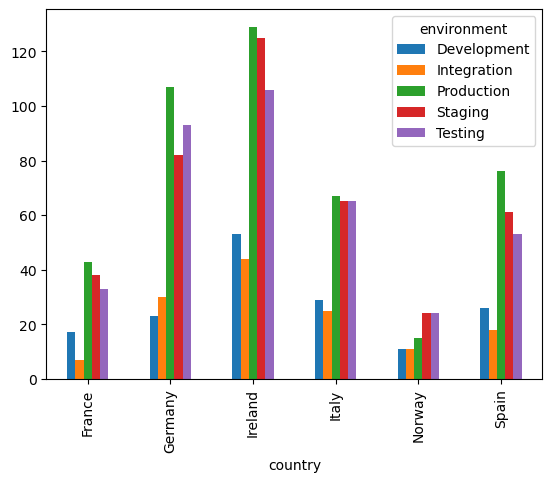

In [12]:
# 10. Generar un único gráfico agrupando para cada país (country) los entornos (enviroment)
group_country_env = df.groupby(["country", "environment"]).size()

group_country_env.unstack().plot(kind='bar');

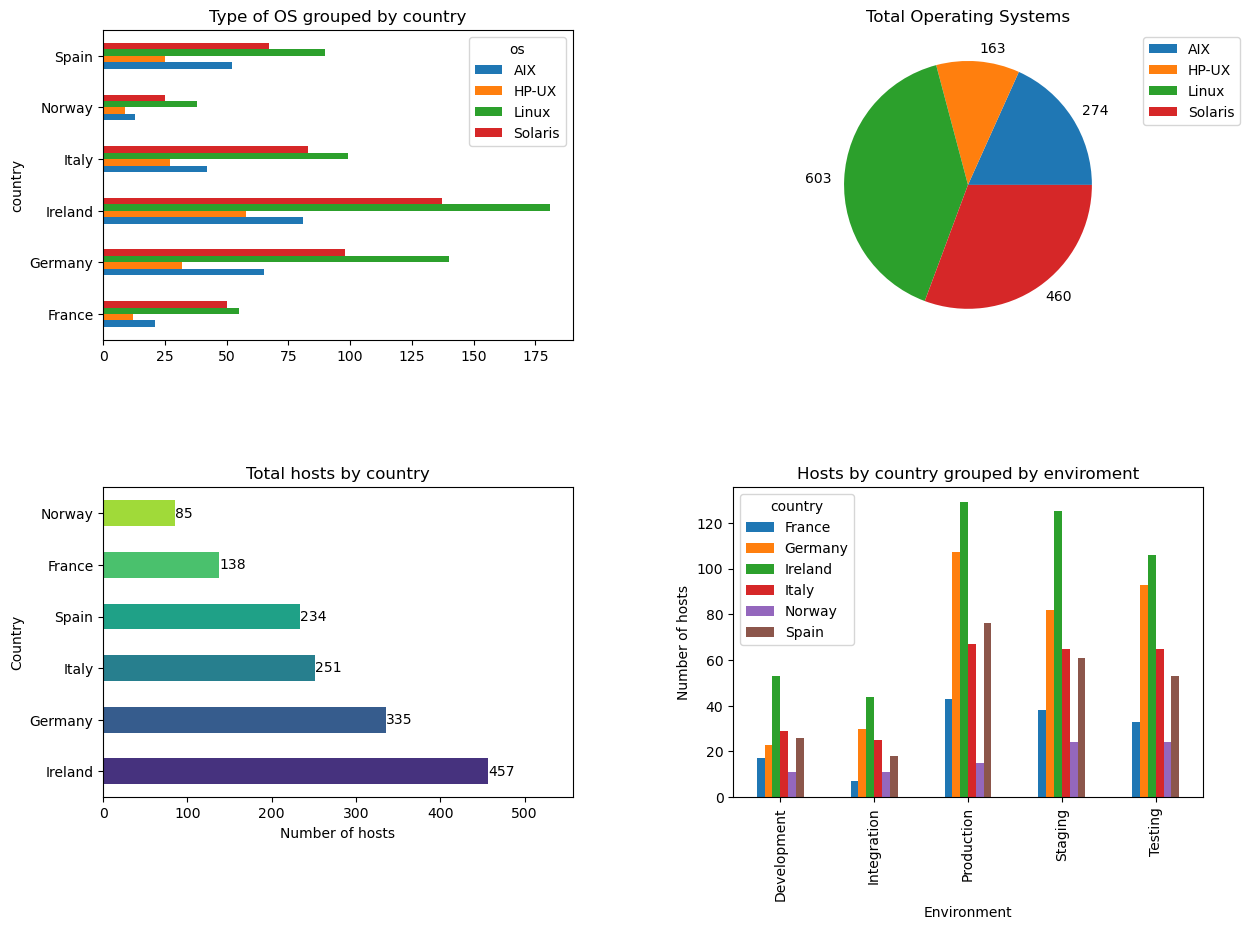

In [127]:
# 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2)

group_country_os = df.groupby(["country", "os"]).size()
group_country_os.unstack().plot(kind="barh", title="Type of OS grouped by country", ax=axs[0,0])

group_os = df.groupby(["os"]).size()
labels = group_os.tolist()
legends = group_os.keys()
legends.tolist()
group_os.plot(kind="pie", title="Total Operating Systems", legend=True, labels=labels, ax=axs[0,1])
axs[0,1].set_ylabel("")
axs[0,1].legend(legends, bbox_to_anchor=(1.4,1), loc='upper right')


num_hostnames = df["country"].value_counts()
num_hostnames.plot(kind="barh", title="Total hosts by country", color=seaborn.color_palette("viridis"), ax=axs[1,0])
axs[1,0].set_xlabel("Number of hosts")
axs[1,0].set_ylabel("Country")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container)
axs[1,0].set_xlim(right=max(num_hostnames)+100) 

group_env_country = df.groupby(["country", "environment"]).size()
group_env_country.unstack(0).plot(kind='bar', title="Hosts by country grouped by enviroment", xlabel="Environment", ylabel="Number of hosts", ax=axs[1,1]);

fig.tight_layout()
fig.set_size_inches(14.5, 12)